# Laboratorio 8
### Boris Rendon 
###### 20180497


In [75]:
!pip install pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

In [58]:
#cargamos el csv con missing data

dfMD = pd.read_csv('titanic_MD.csv')
dfMD.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",?,38.0,1.0,0.0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S


In [59]:
dfMD.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

Aqui podemos ver que existen 4 columnas que tienen data incompleta por valores na, pero tenemos que asegurarnos si existen otro tipo de datos omitidos como pueden ser NULL, blanc , 9,99,999 , ? y entre otros.

Para revisar eso vamos a revisar la tabla Sex para ver si solo hay hombres o mujeres.

In [62]:
np.unique(dfMD['Sex'])

array(['?', 'female', 'male'], dtype=object)

Aqui nos damos cuenta que a pesar que la funcion isna nos dijo que no habian valores nulos, encontramos el símbolo "?" que demuestra un valor nulo. 

Para arreglar eso vamos a hacer una funcion que recorra las columnas y cambie esos valores.


In [63]:
nullvals = ['?', 'nan', 'NaN', 'null', 'Null']
for i in nullvals:
    dfMD = dfMD.replace(i, np.nan)
print(dfMD.isna().sum())

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64


Efectivamente despues de revisar todas las columnas, ahora existen más columnas con valores omitidos.

### Pairwise deletion 

In [64]:
dfMD.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,-0.048190,-0.088806,-0.062083,0.022261
Survived,0.148495,1.000000,-0.034542,-0.257703,0.113987,-0.003365,0.119311
Pclass,-0.089136,-0.034542,1.000000,-0.297872,-0.102294,0.041969,-0.304438
Age,-0.048190,-0.257703,-0.297872,1.000000,-0.087951,-0.279548,-0.130979
SibSp,-0.088806,0.113987,-0.102294,-0.087951,1.000000,0.255152,0.299061
Parch,-0.062083,-0.003365,0.041969,-0.279548,0.255152,1.000000,0.381445
Fare,0.022261,0.119311,-0.304438,-0.130979,0.299061,0.381445,1.000000


In [65]:
dfMD[['Pclass' , 'Survived']].corr()

,Pclass,Survived
Pclass,1.000000,-0.034542
Survived,-0.034542,1.000000


In [66]:
#Droping values
a = len(dfMD)
b = dfMD.dropna()
b = len(b)

print("Datos antes de drop values: " , a , "datos a borrar ", b)

# Se pierde demasiada información a la hora de borrar los datos.


Datos antes de drop values:  183 datos a borrar  100


Se pierde demasiada información en ete caso.

### Imputaciones

In [18]:
dfMD.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

Aqui vemos qué columnas numericas nos van a servir para nuestro análisis de imputaciones

#### Moda

In [19]:
print(dfMD[['Age', 'Parch', 'Fare', 'SibSp']])

      Age  Parch     Fare  SibSp
0    38.0    0.0  71.2833    1.0
1    35.0    0.0  53.1000    1.0
2    54.0    0.0  51.8625    0.0
3     NaN    NaN  16.7000    1.0
4    58.0    0.0  26.5500    NaN
..    ...    ...      ...    ...
178  47.0    1.0      NaN    1.0
179   NaN    0.0   5.0000    0.0
180  56.0    NaN  83.1583    0.0
181  19.0    0.0  30.0000    0.0
182   NaN    0.0  30.0000    0.0

[183 rows x 4 columns]


In [23]:
dfMD[['Age', 'Parch', 'Fare', 'SibSp','Embarked' , 'Sex']] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(dfMD[['Age', 'Parch', 'Fare', 'SibSp','Embarked' , 'Sex']])
print(dfMD.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## Media

In [26]:
dfMD[['Age', 'Parch', 'Fare', 'SibSp']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(dfMD[['Age', 'Parch', 'Fare', 'SibSp']])
print(dfMD.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


##  Mediana

In [27]:
dfMD[['Age', 'Parch', 'Fare', 'SibSp']] = SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(dfMD[['Age', 'Parch', 'Fare', 'SibSp']])
print(dfMD.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#### Age


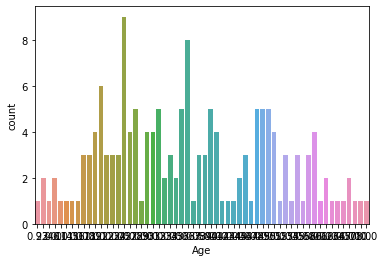

In [91]:
sns.countplot(dfMD[dfMD['Age'].notna()]['Age'])

#### Parch 

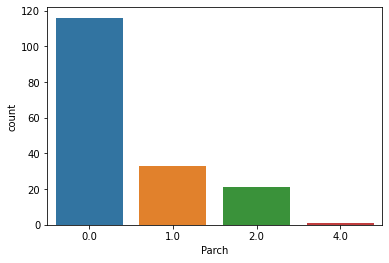

In [92]:
sns.countplot(dfMD[dfMD['Parch'].notna()]['Parch'])

#### Fare

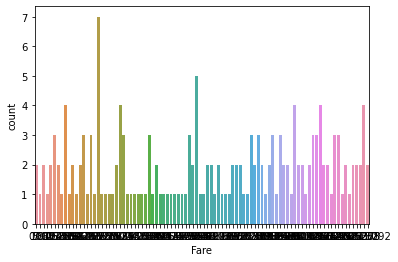

In [93]:
sns.countplot(dfMD[dfMD['Fare'].notna()]['Fare'])

#### SibSp


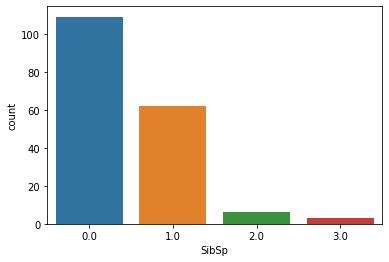

In [94]:
sns.countplot(dfMD[dfMD['SibSp'].notna()]['SibSp'])

#### SEx

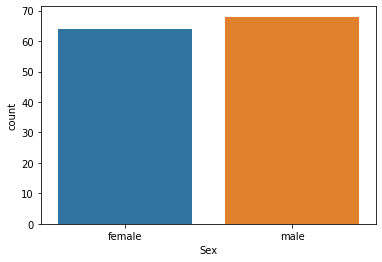

In [95]:
sns.countplot(dfMD[dfMD['Sex'].notna()]['Sex'])

#### Embarked

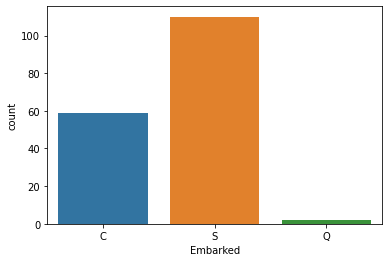

In [96]:
sns.countplot(dfMD[dfMD['Embarked'].notna()]['Embarked'])

# Imputacion sectorizada 

Para valores no numéricos

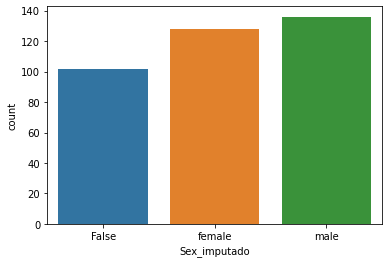

In [90]:
#La variable sex es una variable categorica

sexdf= dfMD.groupby(['Survived'])['Sex'].value_counts()
x = pd.DataFrame(sexdf)
x=x.replace('?',np.nan)

df1 = dfMD.merge(x,how='right', on = 'Survived')
df1['Sex_imputado'] = np.where(df1.Sex_x.isna(), df1.Sex_y.isna(), df1.Sex_x)
sns.countplot(df1.Sex_imputado)


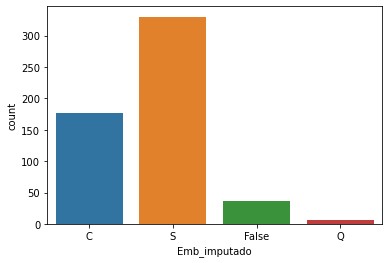

In [88]:
#embarked
emb= dfMD.groupby(['Survived'])['Embarked'].value_counts()
e = pd.DataFrame(emb)


df1 = dfMD.merge(e,how='right', on = 'Survived')
df1['Emb_imputado'] = np.where(df1.Embarked_x.isna(), df1.Embarked_y.isna(), df1.Embarked_x)
sns.countplot(df1.Emb_imputado)


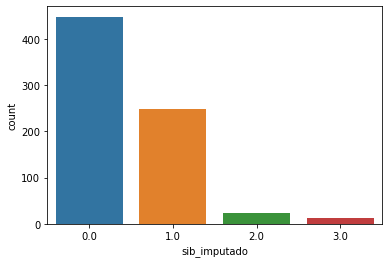

In [104]:
#sibsp
sibsp= dfMD.groupby(['Survived'])['SibSp'].value_counts()
s = pd.DataFrame(sibsp)


df1 = dfMD.merge(s,how='right', on = 'Survived')
df1['sib_imputado'] = np.where(df1.SibSp_x.isna(), df1.SibSp_y.isna(), df1.SibSp_x)
sns.countplot(df1.sib_imputado)


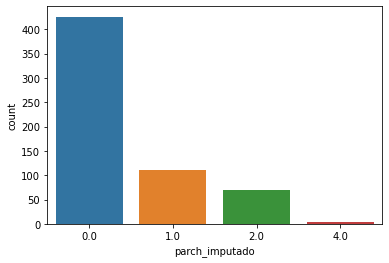

In [106]:
#parch
parch= dfMD.groupby(['Survived'])['Parch'].value_counts()
p = pd.DataFrame(parch)


df1 = dfMD.merge(p,how='right', on = 'Survived')
df1['parch_imputado'] = np.where(df1.Parch_x.isna(), df1.Parch_y.isna(), df1.Parch_x)
sns.countplot(df1.parch_imputado)

# Imputacion por regresion lineal


#### tipo de boleto


Prediccion de supervivencia antes de la predicción 74.45


<ipython-input-131-6d6a1507c577>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare_lm'] = lm.predict(df[['Survived']])


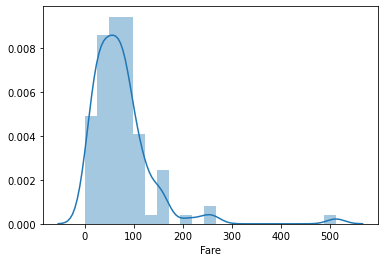

In [131]:
df = dfMD.dropna()
lm = LinearRegression()
lm = lm.fit(df[['Survived']] , df[['Fare']])

df['Fare_lm'] = lm.predict(df[['Survived']])
print('Prediccion de supervivencia antes de la predicción' , round(df['Fare'].mean(),2))
sns.distplot(df['Fare'])

In [133]:



print('Prediccion de supervivencia luego de la prediccion' , df.Fare_lm)



Prediccion de supervivencia luego de la prediccion 1      78.312168
2      68.135742
5      78.312168
9      68.135742
10     68.135742
         ...    
171    78.312168
172    78.312168
173    78.312168
174    78.312168
177    68.135742
Name: Fare_lm, Length: 100, dtype: float64


#### Edad

Prediccion de supervivencia antes de la predicción 36.12


<ipython-input-126-bd2b6fccdba1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_lm'] = lm.predict(df[['Survived']])


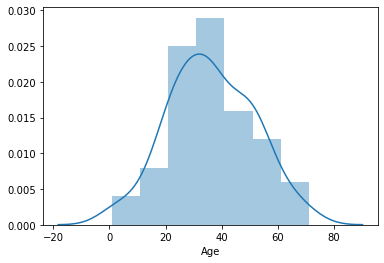

In [126]:
df = dfMD.dropna()
lm = LinearRegression()
lm = lm.fit(df[['Survived']] , df[['Age']])

df['Age_lm'] = lm.predict(df[['Survived']])
print('Prediccion de supervivencia antes de la predicción' , round(df['Age'].mean(),2))
sns.distplot(df['Age'])

In [128]:
print('Posiblidad de supervivencia luego de la prediccion: ', df.Age_lm)


Posiblidad de supervivencia luego de la prediccion:  1      32.176129
2      42.565789
5      32.176129
9      42.565789
10     42.565789
         ...    
171    32.176129
172    32.176129
173    32.176129
174    32.176129
177    42.565789
Name: Age_lm, Length: 100, dtype: float64


### Outliers: Desviacion Estandar

Lower value: -75.09346543091229
Upper value: 233.01184714519795


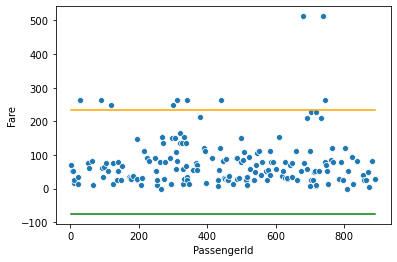

In [137]:
#fare
f = 2
xl = dfMD['Fare'].mean() - (dfMD['Fare'].std() * f)
xu = dfMD['Fare'].mean() + (dfMD['Fare'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)


sns.scatterplot(x = dfMD['PassengerId'], y = dfMD['Fare'])
sns.lineplot(x = dfMD['PassengerId'], y = xl, color = 'green')
sns.lineplot(x = dfMD['PassengerId'], y = xu, color = 'orange')


In [140]:
df = df[(dfMD['Fare']>=xl) & (dfMD['Fare']<=xu)]
df[['Fare']].describe()

<ipython-input-140-4dd7252dcb11>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(dfMD['Fare']>=xl) & (dfMD['Fare']<=xu)]


,Fare
count,165.000000
mean,64.978233
std,47.169102
min,0.000000
25%,28.500000
50%,55.000000
75%,83.475000
max,227.525000


In [143]:
dfMD['Fare_sd'] = np.where(
dfMD.Fare<xl, xl, np.where(dfMD.Fare>xu,xu,dfMD.Fare))
dfMD[['Fare', 'Fare_sd']].describe()

,Fare,Fare_sd
count,175.000000,175.000000
mean,78.959191,74.580154
std,77.026328,60.224965
min,0.000000,0.000000
25%,29.700000,29.700000
50%,56.929200,56.929200
75%,90.539600,90.539600
max,512.329200,233.011847


Lower value: 4.410816187965786
Upper value: 66.97424710317347


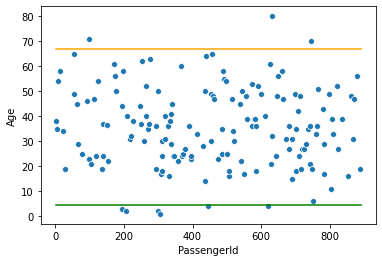

In [144]:
#age
f = 2
xl = dfMD['Age'].mean() - (dfMD['Age'].std() * f)
xu = dfMD['Age'].mean() + (dfMD['Age'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)


sns.scatterplot(x = dfMD['PassengerId'], y = dfMD['Age'])
sns.lineplot(x = dfMD['PassengerId'], y = xl, color = 'green')
sns.lineplot(x = dfMD['PassengerId'], y = xu, color = 'orange')

In [147]:
df = df[(dfMD['Age']>=xl) & (dfMD['Age']<=xu)]
df[['Age']].describe()



<ipython-input-147-c5b490831687>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(dfMD['Age']>=xl) & (dfMD['Age']<=xu)]


,Age,Age_sd
count,158.000000,158.000000
mean,35.692532,35.632200
std,15.640858,15.199386
min,0.920000,4.410816
25%,24.000000,24.000000
50%,35.500000,35.500000
75%,48.000000,48.000000
max,80.000000,66.974247


In [148]:
dfMD['Age_sd'] = np.where(
dfMD.Age<xl, xl, np.where(dfMD.Age>xu,xu,dfMD.Age))
dfMD[['Age', 'Age_sd']].describe()

,Age,Age_sd
count,158.000000,158.000000
mean,35.692532,35.632200
std,15.640858,15.199386
min,0.920000,4.410816
25%,24.000000,24.000000
50%,35.500000,35.500000
75%,48.000000,48.000000
max,80.000000,66.974247


Lower value: -0.8311328579137286
Upper value: 1.7533550801359508


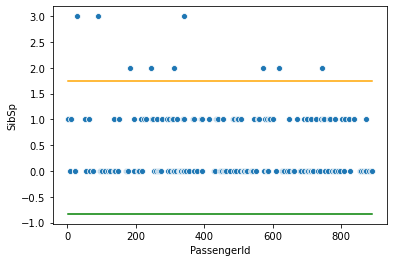

In [149]:
#SibSp

f = 2
xl = dfMD['SibSp'].mean() - (dfMD['SibSp'].std() * f)
xu = dfMD['SibSp'].mean() + (dfMD['SibSp'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)


sns.scatterplot(x = dfMD['PassengerId'], y = dfMD['SibSp'])
sns.lineplot(x = dfMD['PassengerId'], y = xl, color = 'green')
sns.lineplot(x = dfMD['PassengerId'], y = xu, color = 'orange')

In [150]:
df = df[(dfMD['SibSp']>=xl) & (dfMD['SibSp']<=xu)]
df[['SibSp']].describe()


<ipython-input-150-c6b74972b1f0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(dfMD['SibSp']>=xl) & (dfMD['SibSp']<=xu)]


,SibSp
count,130.000000
mean,0.384615
std,0.488386
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [156]:
dfMD['Sib_sd'] = np.where(
dfMD.SibSp<xl, xl, np.where(dfMD.SibSp>xu,xu,dfMD.SibSp))
dfMD[['SibSp', 'Sib_sd']].describe()

,SibSp,Sib_sd
count,180.000000,180.000000
mean,0.461111,0.442887
std,0.646122,0.586538
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,3.000000,1.968858


Lower value: -1.0448816421007654
Upper value: 1.9688582502879


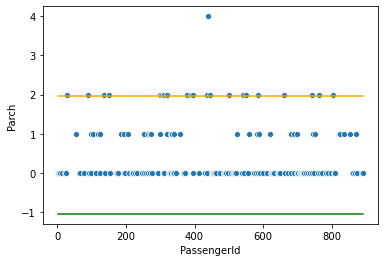

In [152]:
#parch
f = 2
xl = dfMD['Parch'].mean() - (dfMD['Parch'].std() * f)
xu = dfMD['Parch'].mean() + (dfMD['Parch'].std() * f)
print('Lower value:', xl)
print('Upper value:', xu)


sns.scatterplot(x = dfMD['PassengerId'], y = dfMD['Parch'])
sns.lineplot(x = dfMD['PassengerId'], y = xl, color = 'green')
sns.lineplot(x = dfMD['PassengerId'], y = xu, color = 'orange')

In [153]:
df = df[(dfMD['Parch']>=xl) & (dfMD['Parch']<=xu)]
df[['Parch']].describe()

<ipython-input-153-06b987bbed23>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(dfMD['Parch']>=xl) & (dfMD['Parch']<=xu)]


,Parch
count,109.000000
mean,0.174312
std,0.381130
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [155]:
dfMD['Parch_sd'] = np.where(
dfMD.Parch<xl, xl, np.where(dfMD.Parch>xu,xu,dfMD.Parch))
dfMD[['Parch', 'Parch_sd']].describe()

,Parch,Parch_sd
count,171.000000,171.000000
mean,0.461988,0.446286
std,0.753435,0.703866
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,4.000000,1.968858


### Outliers : percentil

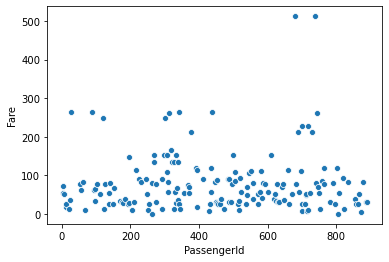

In [163]:
#fare
pl = np.percentile(dfMD['Fare'], 5)
pu = np.percentile(dfMD['Fare'], 95)

sns.scatterplot(x = dfMD['PassengerId'], y = dfMD['Fare'])

sns.lineplot(x = dfMD['PassengerId'], y = pl, color = 'red')
sns.lineplot(x = dfMD['PassengerId'], y = pu, color = 'green')



In [166]:
df_sd = dfMD[(df['Fare']>=pl) & (dfMD['Fare']<=pu)]
dfMD.Fare.describe()

count    175.000000
mean      78.959191
std       77.026328
min        0.000000
25%       29.700000
50%       56.929200
75%       90.539600
max      512.329200
Name: Fare, dtype: float64

In [169]:
dfMD['Fare_pct'] = np.where(
    dfMD['Fare']<pl,
    pl,
    np.where(
        dfMD['Fare']>pu,
        pu,
        dfMD['Fare']
    )
)
dfMD[['Fare', 'Fare_sd', 'Fare_pct']].describe()


,Fare,Fare_sd,Fare_pct
count,175.000000,175.000000,175.000000
mean,78.959191,74.580154,78.959191
std,77.026328,60.224965,77.026328
min,0.000000,0.000000,0.000000
25%,29.700000,29.700000,29.700000
50%,56.929200,56.929200,56.929200
75%,90.539600,90.539600,90.539600
max,512.329200,233.011847,512.329200


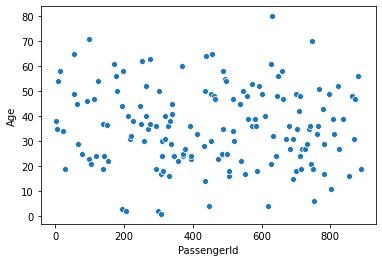

In [170]:
#age
pl = np.percentile(dfMD['Age'], 5)
pu = np.percentile(dfMD['Age'], 95)

sns.scatterplot(x = dfMD['PassengerId'], y = dfMD['Age'])

sns.lineplot(x = dfMD['PassengerId'], y = pl, color = 'red')
sns.lineplot(x = dfMD['PassengerId'], y = pu, color = 'green')



In [171]:
df_sd = dfMD[(df['Age']>=pl) & (dfMD['Age']<=pu)]
dfMD.Age.describe()

count    158.000000
mean      35.692532
std       15.640858
min        0.920000
25%       24.000000
50%       35.500000
75%       48.000000
max       80.000000
Name: Age, dtype: float64

In [172]:
dfMD['Age_pct'] = np.where(
    dfMD['Age']<pl,
    pl,
    np.where(
        dfMD['Age']>pu,
        pu,
        dfMD['Age']
    )
)
dfMD[['Age', 'Age_sd', 'Age_pct']].describe()


,Age,Age_sd,Age_pct
count,158.000000,158.000000,158.000000
mean,35.692532,35.632200,35.692532
std,15.640858,15.199386,15.640858
min,0.920000,4.410816,0.920000
25%,24.000000,24.000000,24.000000
50%,35.500000,35.500000,35.500000
75%,48.000000,48.000000,48.000000
max,80.000000,66.974247,80.000000


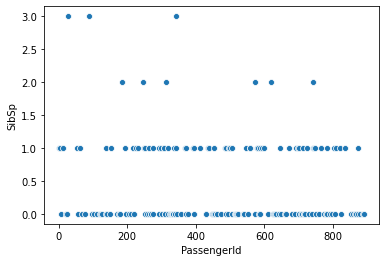

In [175]:
#sibSp
pl = np.percentile(dfMD['SibSp'], 5)
pu = np.percentile(dfMD['SibSp'], 95)

sns.scatterplot(x = dfMD['PassengerId'], y = dfMD['SibSp'])

sns.lineplot(x = dfMD['PassengerId'], y = pl, color = 'red')
sns.lineplot(x = dfMD['PassengerId'], y = pu, color = 'green')

In [176]:
df_sd = dfMD[(df['SibSp']>=pl) & (dfMD['SibSp']<=pu)]
dfMD.SibSp.describe()

count    180.000000
mean       0.461111
std        0.646122
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: SibSp, dtype: float64

In [178]:
dfMD['SibSp_pct'] = np.where(
    dfMD['SibSp']<pl,
    pl,
    np.where(
        dfMD['SibSp']>pu,
        pu,
        dfMD['SibSp']
    )
)
dfMD[['SibSp', 'Sib_sd', 'SibSp_pct']].describe()


,SibSp,Sib_sd,SibSp_pct
count,180.000000,180.000000,180.000000
mean,0.461111,0.442887,0.461111
std,0.646122,0.586538,0.646122
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,3.000000,1.968858,3.000000


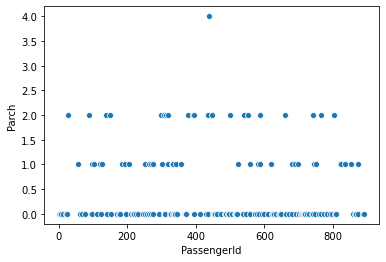

In [179]:
#parch
pl = np.percentile(dfMD['Parch'], 5)
pu = np.percentile(dfMD['Parch'], 95)

sns.scatterplot(x = dfMD['PassengerId'], y = dfMD['Parch'])

sns.lineplot(x = dfMD['PassengerId'], y = pl, color = 'red')
sns.lineplot(x = dfMD['PassengerId'], y = pu, color = 'green')

In [180]:
df_sd = dfMD[(df['Parch']>=pl) & (dfMD['Parch']<=pu)]
dfMD.Parch.describe()

count    171.000000
mean       0.461988
std        0.753435
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: Parch, dtype: float64

In [181]:
dfMD['Parch_pct'] = np.where(
    dfMD['Parch']<pl,
    pl,
    np.where(
        dfMD['Parch']>pu,
        pu,
        dfMD['Parch']
    )
)
dfMD[['Parch', 'Parch_sd', 'Parch_pct']].describe()


,Parch,Parch_sd,Parch_pct
count,171.000000,171.000000,171.000000
mean,0.461988,0.446286,0.461988
std,0.753435,0.703866,0.753435
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,4.000000,1.968858,4.000000
